In [1]:
using Revise
using Plots
using GLMakie
using Statistics

pathBase = "/Users/csfloyd/Dropbox/Projects/TCB2Network/repositories/TCB2Network/Julia/src/"
includet(pathBase * "SimMain.jl")
includet(pathBase * "Visualization.jl")
includet(pathBase * "ReactAdvDiff.jl")
includet(pathBase * "Mechanics.jl")
includet(pathBase * "LightControl.jl")
includet(pathBase * "SharedStructs.jl")
using .SharedStructs
includet(pathBase * "MathFunctions.jl")
using .MathFunctions


In [8]:
# set default parameters
parameters = Dict(
# grid params
"domainType" => "rz",
"Nx" => 250,
"Ny" => 80,
"dx" => 1.0,
"dt" => 2.0e-4,
"nSteps" => 2.5 * 200,
"timeStride" => 1,
"startCollecting" => 0,
"seed" => 0,
    
# boundary conditions
"bcU_X" => "neuCyl",
"bcU_Y" => "neu",

"bcRAD_X" => "neuCyl",
"bcRAD_Y" => "neu",

# chemical parameters
"kAct" => 5e1,
"kInact" => 5e0,
"kTrap" => 3e2,
"kRel" => 7e2,
"kIBind" => 1e-1,
"kIUnbind" => 1e0,
"kABind" => 1e-1,
"kAUnbind" => 0,
"beta" => 1.0,
"CSat" => 5,
    
"DT" => 1,
"DD" => 25,
"DC" => 250,
    
"CDI0" => 2.5,
"CDA0" => 0,
"CBI0" => 0.1,
"CBA0" => 0,
"CC0" => 0,
"CD0" => 20,
"CDst0" => 20,
    
# light control
# "width" => 5,
# "r0" => 75,
# "starBool" => true,
    
"chemOnly" => true,
    
"width" => 2,
"r0" => 50,
"starBool" => true,
    
"zWidth" => 20,
    
"movingCircle" => (false, 50, 2.5),
    
"len" => 1,    
"cyc" => 3,
"del" => 0.25,
    
"lambda0" => 3.0,
"mu0" => 3.0,
"gMin" => 0.5

);

println("T is ", parameters["dt"] * parameters["nSteps"])

println("Done.")

T is 0.1
Done.


In [14]:
(250 * 88) / (400 * 400) 

0.1375

In [11]:
31858 / 3600

8.849444444444444

In [75]:
GC.gc()

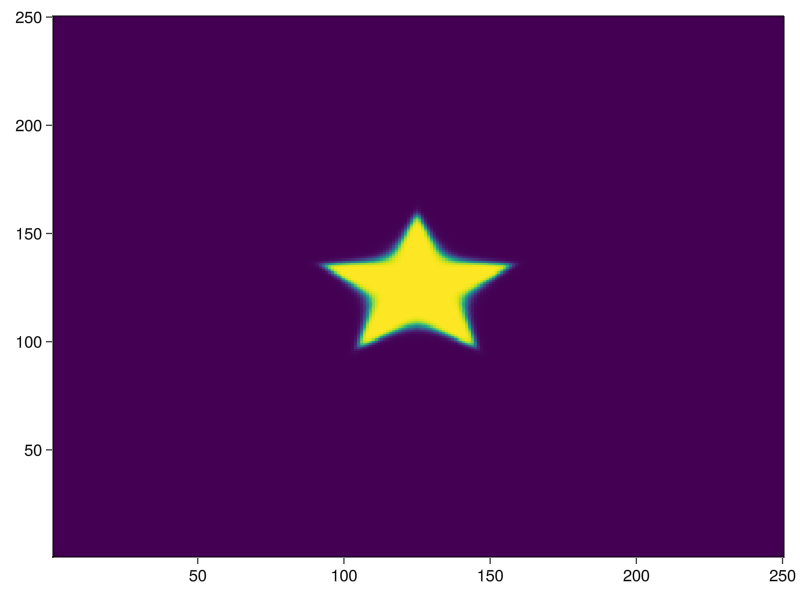

In [29]:
LightControl.thetaFunc(75, 70, 75, 75)
star = [LightControl.starxyPattern(x, y, 125, 125, 10, 2) for x in 1:250, y in 1:250]
Makie.heatmap(star)

In [47]:
# iFun = LightControl.getiFun(parameters["cyc"], parameters["len"], parameters["del"], parameters["nSteps"] * parameters["dt"])

# trange = collect(0:0.01:25.0)
# Makie.lines(trange, iFun.(trange))

In [26]:
maximum(LightControl.gammaSoAFuncrz(Grid2D(parameters["Nx"], parameters["Ny"], 1), 
        parameters["r0"], parameters["width"], parameters["zWidth"], 1).Values)

1.0

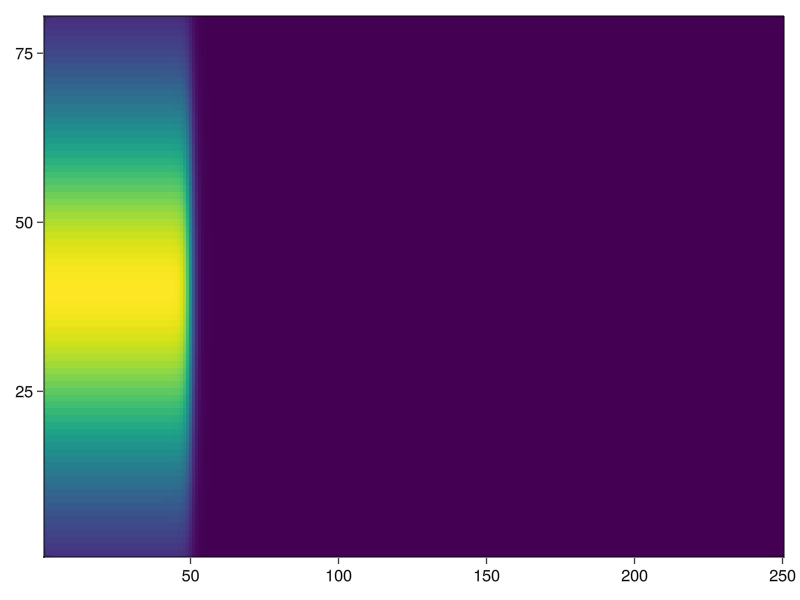

In [20]:
Makie.heatmap(LightControl.gammaSoAFuncrz(Grid2D(parameters["Nx"], parameters["Ny"], 1), 
        parameters["r0"], parameters["width"], parameters["zWidth"], 1).Values)

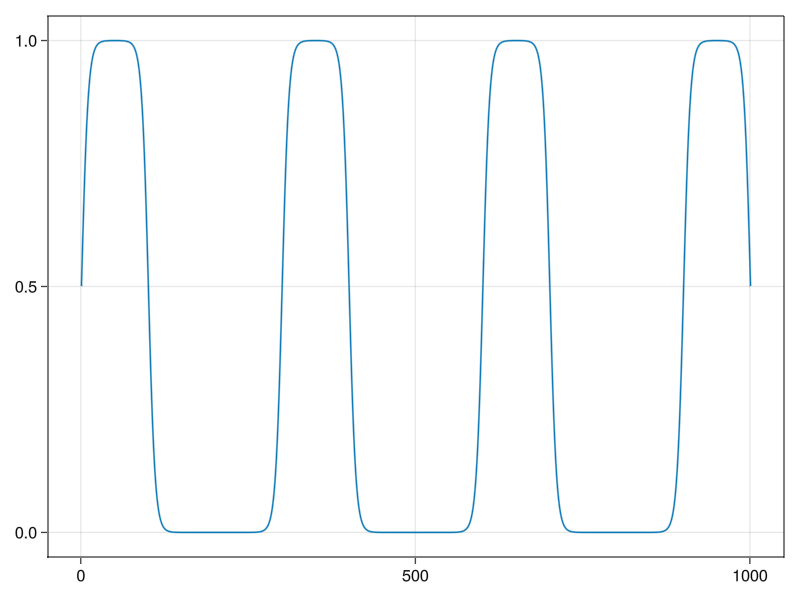

In [18]:


Makie.lines(LightControl.getiFun(3,1,0.05,10).(collect(0:0.01:10)))

In [9]:
# using Profile
# using ProfileView
(cFArray, dFArray) = SimMain.InitializeAndRun(parameters);

Initializing...
Done initializing.
Beginning simulation...
  6.360644 seconds (672.01 k allocations: 12.794 GiB, 32.75% gc time)
Done with simulation.


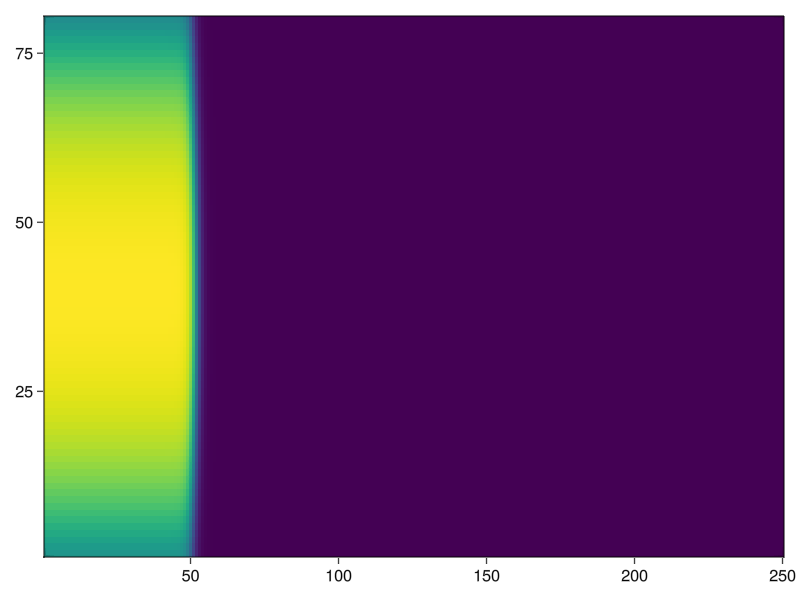

In [10]:
Makie.heatmap(cFArray[end].CDASoA.Values)

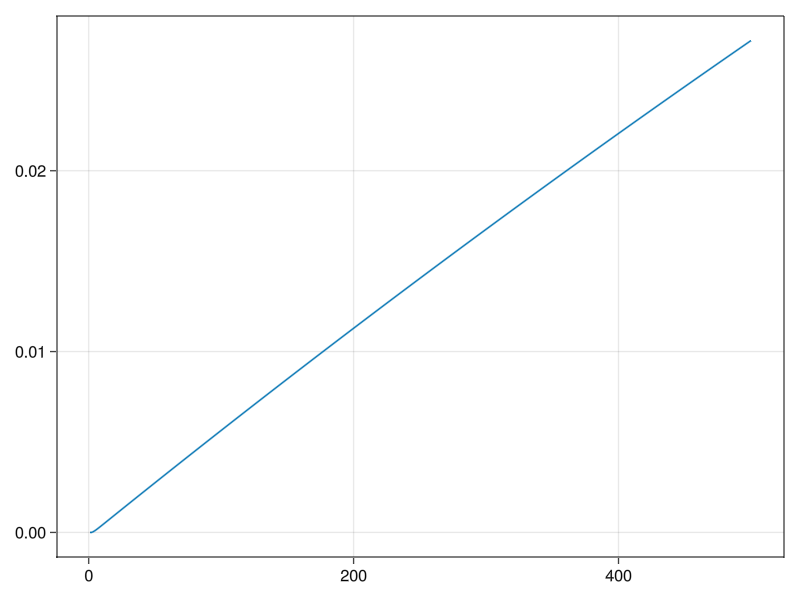

In [5]:
Makie.lines([cFArray[t].CDASoA.Values[3,75] for t in 1:length(cFArray)])
#Makie.lines([dFArray[t].uxSoA.Values[70,1] for t in 1:length(cFArray)])
# Makie.lines([iFun(dt * t * timeStride) for t in 1:length(cFArray)])
#Makie.ylims!(0,2.5)
current_figure()

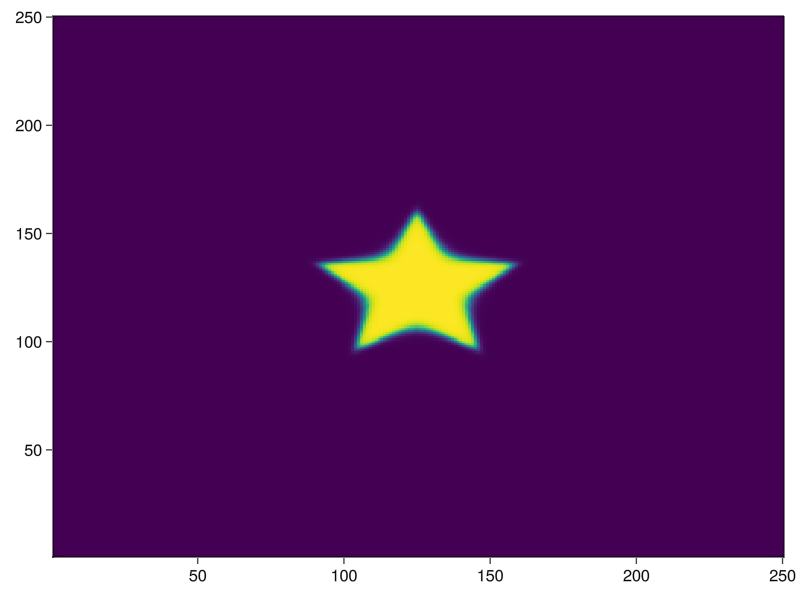

In [11]:
Makie.heatmap(cFArray[end].CDASoA.Values)

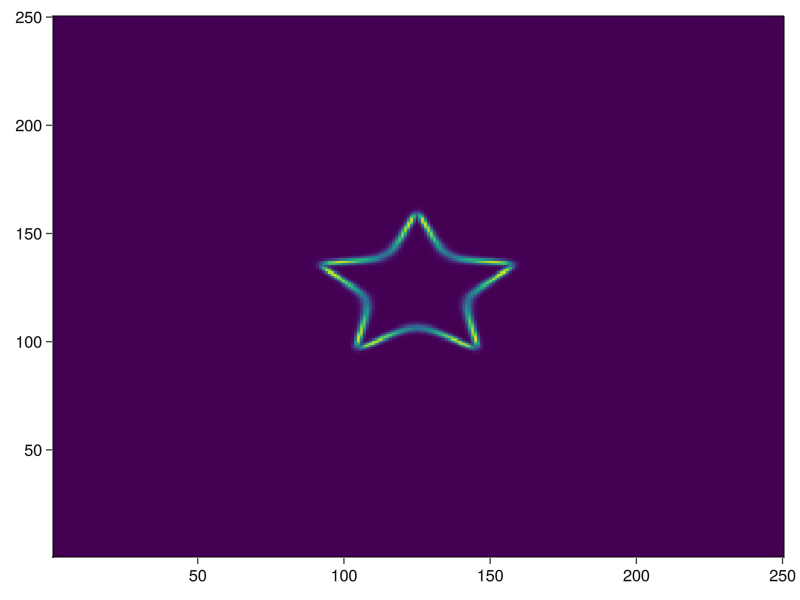

In [10]:
Makie.heatmap(dFArray[end].uySoA.Values.^2 .+ dFArray[end].uxSoA.Values.^2)

In [49]:
cFArray[Int(15 / parameters["dt"])].CDISoA.Values[75,1]

0.008488473210276794

In [8]:
dFArray[Int(15 / parameters["dt"])].uxSoA.Values[75,1]

-0.6672285282942461

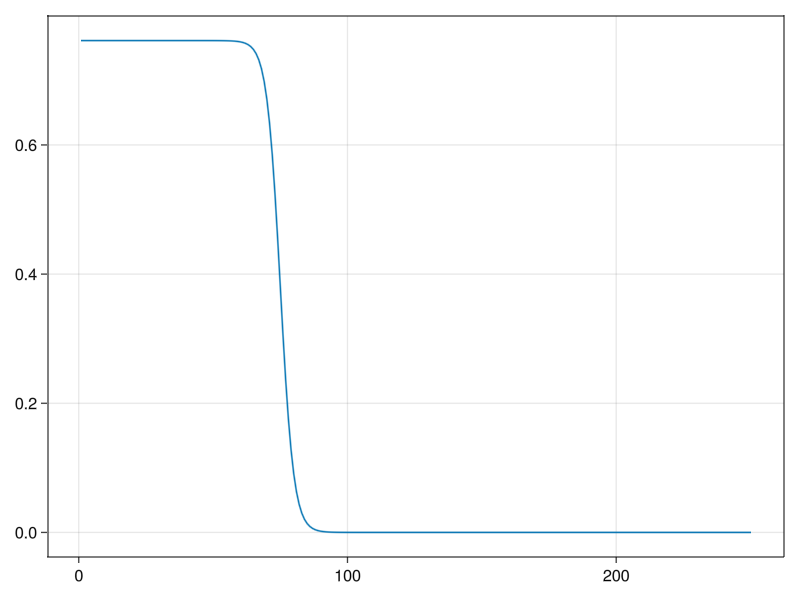

In [65]:
gammaSoA = LightControl.gammaSoAFuncCyl(grid, parameters["r0"], parameters["width"], iFun(dt * 2000))
Makie.lines(gammaSoA.Values[1:end])

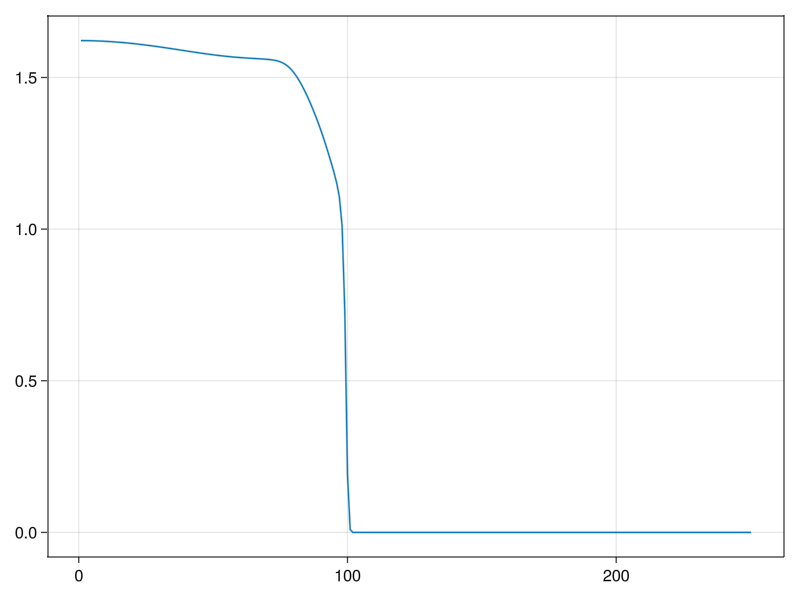

In [84]:
Makie.lines(cFArray[end].CBASoA.Values[1:end])

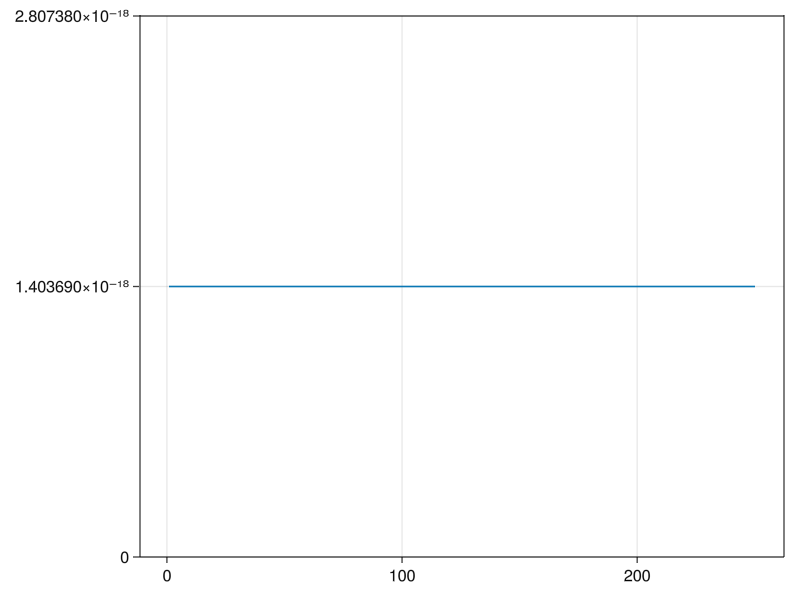

In [19]:
Makie.lines(cFArray[end].CBASoA.Values[1:end])

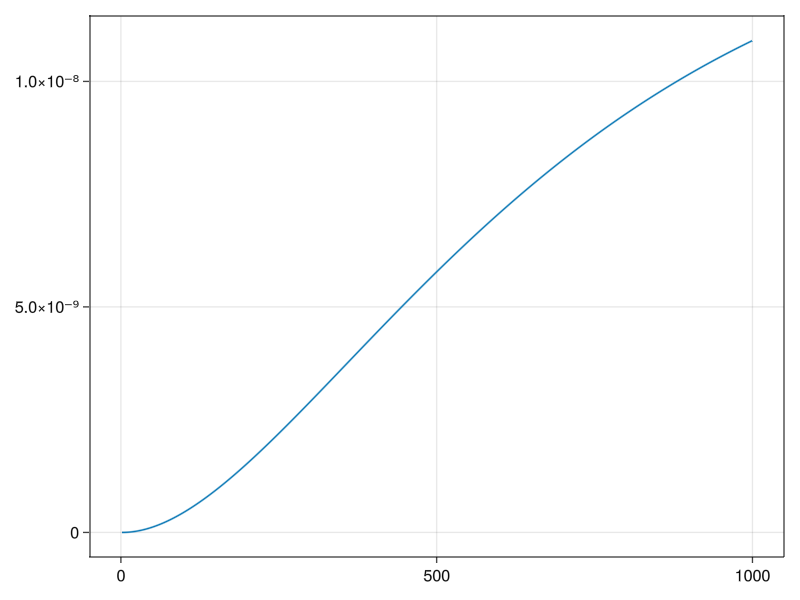

In [47]:
Makie.lines([dFArray[t].uySoA.Values[40, 50] for t in 1:length(cFArray)])

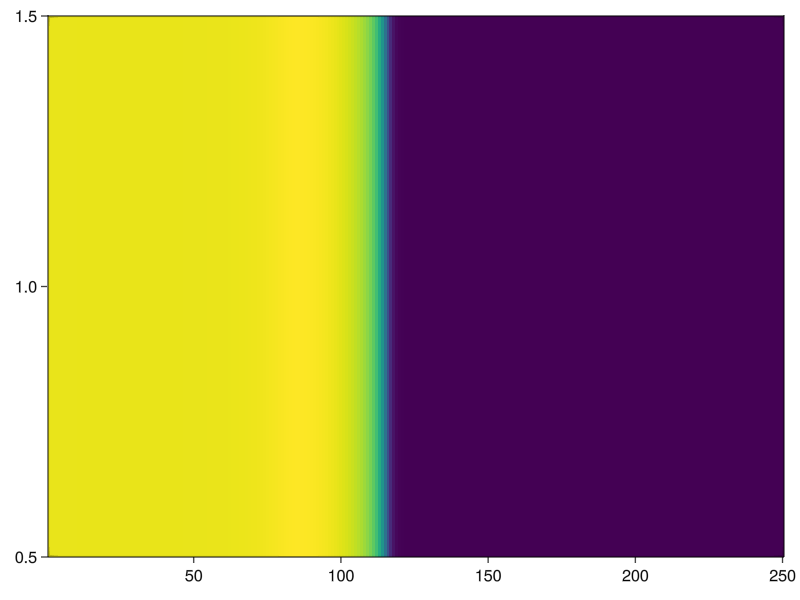

In [73]:
Makie.heatmap(cFArray[end].CDASoA.Values)